# Learning atomic charges

In [1]:
%pylab inline
import numpy as np
import quippy
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

Populating the interactive namespace from numpy and matplotlib


Load a database of atomic charges

In [2]:
atAll = quippy.AtomsList("../data_GDB9.xyz")

Define a SOAP descriptor

In [23]:
Z = 8
desc = quippy.Descriptor(
        "soap atom_sigma=0.3 n_max=6 l_max=6 cutoff=2 cutoff_transition_width=0.5 Z={:d} n_species=5 species_Z='1 6 7 8 9'".format(Z))

Evaluate the descriptor for all input configurations. This will take some time to run...

In [24]:
d=[]
c=[]
for at in atAll:
    at.set_cutoff(desc.cutoff())
    at.calc_connect()
    
    #descAt = quippy.fzeros((desc.dimensions(),desc.descriptor_sizes(at)[0]))
    descAt = desc.calc(at)["descriptor"]
    
    for dd in descAt:
        d.append(dd)
    for i in quippy.frange(at.n):
        if at.Z[i] == Z:
            c.append(at.charge[i])
d = np.array(d)
c = np.array(c)

Train a GP on a subset of the charge data using the SOAP descriptor

In [25]:
nTeach = 1000
epsTeach = 0.01
zeta = 1
xTeach = d[:nTeach,:]
yTeach = c[:nTeach]

cTeach = np.dot(xTeach,xTeach.T)**zeta + epsTeach**2 * np.eye(nTeach)
alpha = np.linalg.solve(cTeach,yTeach)

In [26]:
xTest = d[nTeach:,:]
yTest = c[nTeach:]
cTest = np.dot(xTest,xTeach.T)**zeta
yTestPredict = np.dot(cTest,alpha)

0.0330135380754


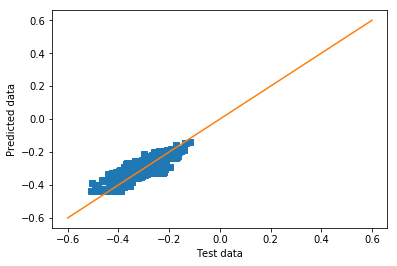

In [27]:
plt.plot(yTest,yTestPredict,"s")
plt.plot([-0.6,0.6],[-0.6,0.6])
plt.xlabel("Test data")
plt.ylabel("Predicted data")
print np.sqrt(np.mean((yTest-yTestPredict)**2))